# Projeto 5 - Regressão linera múltipla

## Ciência dos dados

## Felipe Viacava e Felipe Giorgi

### Entrega 3: Análise de regressão

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm1
import statsmodels.formula.api as sm

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Felipe Giorgi\Desktop\3° Semestre\DP - Ciência dos Dados\CD1S17\Projeto 5\Etapa 3


In [3]:
idh = pd.read_excel('Indicator_HDI.xlsx', index_col=0)
fs = pd.read_excel('indicator food_consumption.xlsx', index_col=0)
crc = pd.read_excel('indicator colon and rectum male incidence.xlsx', index_col=0)

In [4]:
IDH = idh[2000]
FS = fs[2002]
CRC = crc[2002]

In [5]:
data = pd.concat([IDH, FS, CRC], axis = 1, join='inner')

In [6]:
data.head()

,2000,2002,2002
Afghanistan,0.230,NaN,5.2
Albania,0.691,2864.93,28.1
Algeria,0.624,3034.33,5.5
Angola,0.384,1833.90,4.3
Argentina,0.749,2965.90,30.1


In [7]:
data.columns = ["IDH", "FS", "CRC"]
data = data[~np.isnan(data.IDH)]
data = data[~np.isnan(data.FS)]
data = data[~np.isnan(data.CRC)]
data.head()

,IDH,FS,CRC
Albania,0.691,2864.93,28.1
Algeria,0.624,3034.33,5.5
Angola,0.384,1833.90,4.3
Argentina,0.749,2965.90,30.1
Armenia,0.643,2150.57,8.5


In [8]:
data.describe()

,IDH,FS,CRC
count,132.000000,132.000000,132.000000
mean,0.615023,2727.953485,17.204545
std,0.185692,540.084961,14.992033
min,0.224000,1546.670000,1.000000
25%,0.449000,2262.612500,5.100000
50%,0.639500,2777.970000,11.300000
75%,0.753250,3127.002500,27.100000
max,0.913000,3753.780000,56.600000


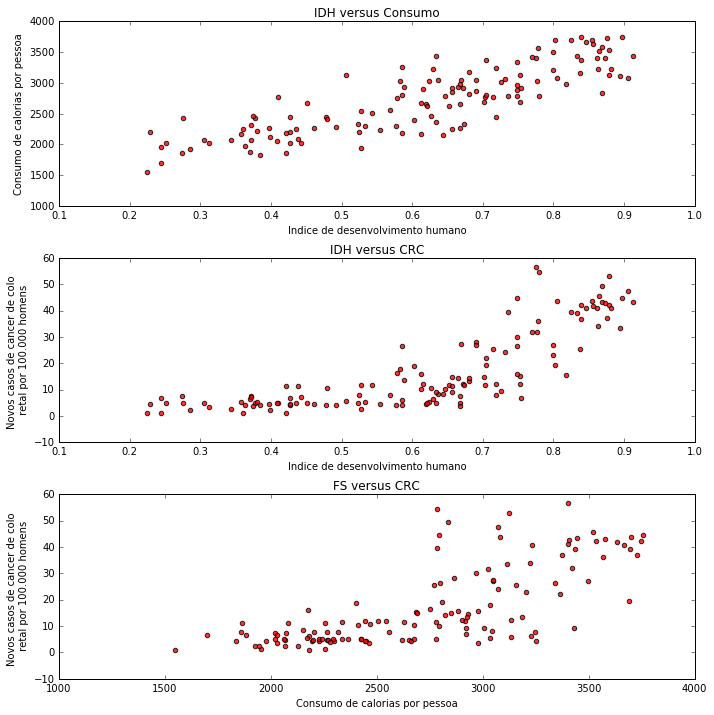

In [18]:
fig = plt.figure(figsize=(10, 10))
plt.subplot(311)
plt.scatter(data.IDH, data.FS, c='red', alpha=0.8)
plt.title('IDH versus Consumo')
plt.xlabel('Indice de desenvolvimento humano')
plt.ylabel('Consumo de calorias por pessoa')

plt.subplot(312)
plt.scatter(data.IDH, data.CRC, c='red', alpha=0.8)
plt.title('IDH versus CRC')
plt.xlabel('Indice de desenvolvimento humano')
plt.ylabel('Novos casos de cancer de colo \n retal por 100.000 homens')

plt.subplot(313)
plt.scatter(data.FS, data.CRC, c='red', alpha=0.8)
plt.title('FS versus CRC')
plt.xlabel('Consumo de calorias por pessoa')
plt.ylabel('Novos casos de cancer de colo \n retal por 100.000 homens')

plt.tight_layout()
plt.show()

In [10]:
data.corr(method='pearson')

,IDH,FS,CRC
IDH,1.000000,0.845743,0.787927
FS,0.845743,1.000000,0.720107
CRC,0.787927,0.720107,1.000000


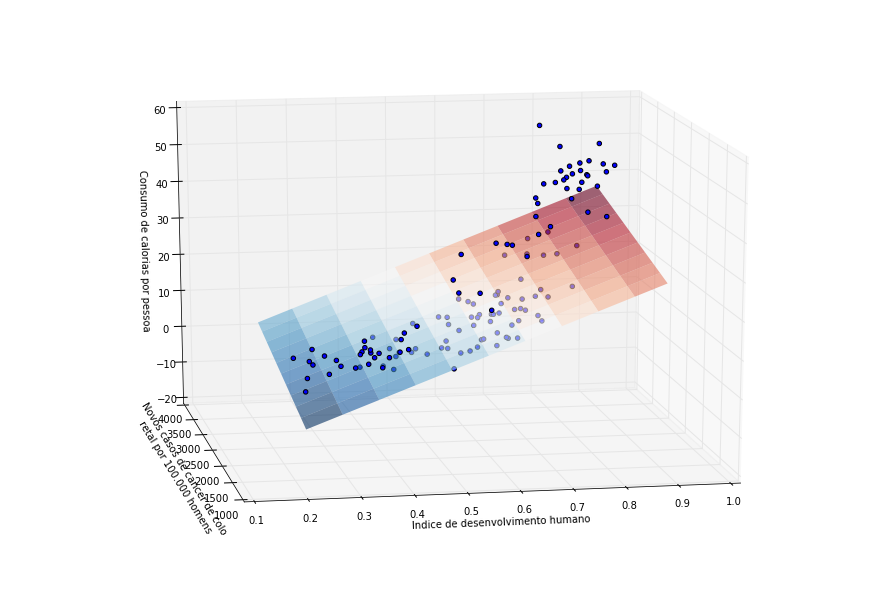

In [19]:
X = data[['IDH', 'FS']]
y = data['CRC']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

x1, x2 = np.meshgrid(np.linspace(X.IDH.min(), X.IDH.max(), 100), np.linspace(X.FS.min(), X.FS.max(), 100))

y_chapeu = est.params[0] + est.params[1] * x1 + est.params[2] * x2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-100, elev=15)

surf = ax.plot_surface(x1, x2, y_chapeu, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].IDH, X[resid >= 0].FS, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].IDH, X[resid < 0].FS, y[resid < 0], color='black', alpha=1.0)

ax.set_xlabel('Indice de desenvolvimento humano')
ax.set_ylabel('Novos casos de cancer de colo \n retal por 100.000 homens')
ax.set_zlabel('Consumo de calorias por pessoa')

In [20]:
y = data.CRC
X["log_FS"] = np.log(data.FS)
X=sm1.add_constant(X)
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CRC   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     90.85
Date:                Wed, 31 May 2017   Prob (F-statistic):           1.47e-31
Time:                        15:23:37   Log-Likelihood:                -468.90
No. Observations:                 132   AIC:                             945.8
Df Residuals:                     128   BIC:                             957.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       1077.9141    248.512      4.337      0.000       586.191  1569.637
IDH           57.7893      7.725      7.481      0.000        42.505    73.074
FS             0.0633      0.013      4.760      0.000         0.037     0.090
log_FS      -160.8039     36.120     -4.452      0.000      -232.274   -89.334
==============================================================================
Omnibus:                       15.597   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.158
Skew:                           0.677   Prob(JB):                     4.19e-05
Kurtosis:                       4.354   Cond. No.                     9.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""